In [11]:
# Importing the necessary modules 
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import glob
import pandas as pd
import os 
import cv2 
import numpy as np 
import tensorflow as tf  
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Reading Image Data

In [2]:
# Getting the path to the working directory 
workingDir = "./raw_data/"
PATH = os.path.sep.join([workingDir, ""])

# Getting the path ot the training directory 
train_dir = os.path.join(PATH, "cell_images")

# Getting the path to the validation directory 
validation_dir = os.path.join(PATH, "cell_images")

In [3]:
parasitized_train_dir = os.path.join(train_dir, "Parasitized")
uninfected_train_dir = os.path.join(train_dir, "Uninfected")


parasitized_val_dir = os.path.join(validation_dir, "Parasitized") 
uninfected_val_dir = os.path.join(validation_dir, "Uninfected")

# EDA (Exploratory Data Analysis)

<h1>Understanding The Data</h1>
Let us look at how many parasitized and ininfected cell images are present

In [4]:
parasitized_images = len(os.listdir(parasitized_train_dir))
uninfected_images = len(os.listdir(uninfected_train_dir))

parasitized_images_val = len(os.listdir(parasitized_val_dir)) 
uninfected_images_val = len(os.listdir(uninfected_val_dir)) 


total_train = parasitized_images + uninfected_images  
total_val = parasitized_images_val + uninfected_images_val 


print("Total Training parasitized images: {}".format(parasitized_images)); 
print("Total Training uninfected images: {}".format(uninfected_images)); 
print("__________________________________________________________________________________________________________\n");

 
print("Total Validation parasitized images: {}".format(parasitized_images_val)); 
print("Total Validation uninfected images: {}".format(uninfected_images_val)); 
print("__________________________________________________________________________________________________________\n"); 

# Displaying the total values for the images in both the training and validation directory 
print("Total Train: {}".format(total_train)); 
print("Total Validation: {}".format(total_val)); 

Total Training parasitized images: 13780
Total Training uninfected images: 13780
__________________________________________________________________________________________________________

Total Validation parasitized images: 13780
Total Validation uninfected images: 13780
__________________________________________________________________________________________________________

Total Train: 27560
Total Validation: 27560


In [5]:
# Setting the batch size,image height and width parameters 
batch_size_train = 11023
batch_size_valid = 2756
IMG_HEIGHT = 98 
IMG_WIDTH = 98 

In [8]:
train_image_gen = ImageDataGenerator(rescale = 1.0 / 255.0)
validation_image_gen = ImageDataGenerator(rescale = 1.0 / 255.0) 


train_data_gen = train_image_gen.flow_from_directory(batch_size = batch_size_train, 
                                                    directory = train_dir, 
                                                    shuffle = True, 
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH), 
                                                    class_mode = "binary")


validation_data_gen =validation_image_gen.flow_from_directory(batch_size = batch_size_valid, 
                                                             directory = validation_dir, 
                                                             shuffle = True, 
                                                             target_size = (IMG_HEIGHT, IMG_WIDTH), 
                                                             class_mode = "binary")

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.


# Visualize the data

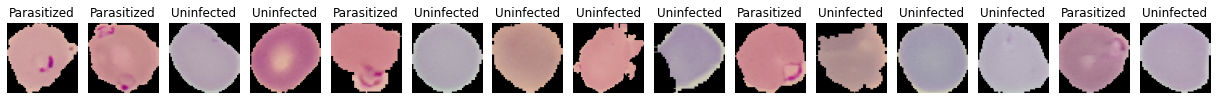

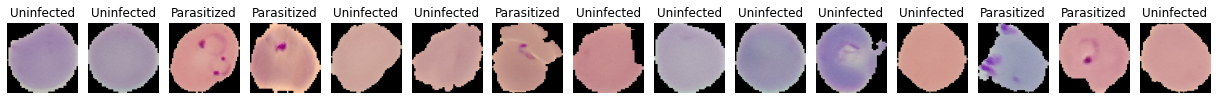

In [10]:

sample_training_images, train_label = next(train_data_gen) 


sample_training_images, train_label = next(train_data_gen) 

sample_validation_images, val_label = next(validation_data_gen) 


def plotImages(images, batch=None): 
    global train_data_gen 
    fig, axes = plt.subplots(1, 15, figsize=(17, 20))
    # Flatten the axes 
    axes = axes.flatten() 

    for img, ax, labels in zip(images, axes, batch): 
     
        for key, value in train_data_gen.class_indices.items(): 
           
            labels = int(labels) 
           
            if value == labels: 
                ax.set_title(key) 
                ax.imshow(img) 
                ax.axis("off")
                
    # Displaying the plot 
    plt.tight_layout() 
    plt.show() 
    
    
# Plotting 15 random images from the sample training images with its respective labels 
plotImages(sample_training_images[:15], train_label[:15])

# Plotting 15 images from the sample validation images 
plotImages(sample_validation_images[:15], val_label[:15])


# Pre Processing Image Data

In [39]:
def plot_image(path):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

Lets take a Parastized Image and preprocess it 

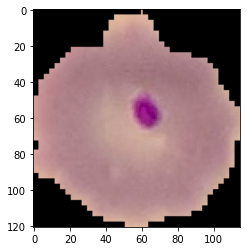

In [42]:
Parastized_img_path = "raw_data/cell_images/Parasitized/C33P1thinF_IMG_20150619_121229a_cell_177.png"
plot_image(Parastized_img_path)

In [43]:
im = cv2.imread(Parastized_img_path)

Applying Gaussian Blur to the image

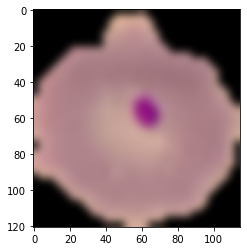

In [46]:
im = cv2.GaussianBlur(im,(5,5),2) #(5,5) is the mask the larger the size better the blur
step2_path = 'Parastized_GaussianBlur.png'
cv2.imwrite(step2_path, im)
plot_image(step2_path)

Converting it to gray scale as will help models easily understand the images

In [51]:
#convert to grayscale image
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
step3_path = 'Parastized_Gray.png'
cv2.imwrite(step3_path , im_gray)

True

<img src='Parastized_Gray.png'>

changing threshold inorder to identify contours

In [55]:
ret,thresh = cv2.threshold(im_gray,127,255,0)
step4_path = 'Parastized_White.png'
cv2.imwrite(step4_path, thresh)

True

<img src='Parastized_White.png'>

Highlighting contour area

In [56]:
contours,_ = cv2.findContours(thresh,1,2)
for contour in contours:
        cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)
step5_path = 'Parastized_Contour.png'
cv2.imwrite(step5_path, im_gray)

True

<img src='Parastized_Contour.png'>

Calculating area and preparing the data set

In [79]:
temp = []
for i in range(5):
    try:
        area = cv2.contourArea(contours[i])
        #file.write(str(area))
        temp.append(str(area))
    except:
        #file.write("0")
        temp.append(str(0))
print("Area = ")
temp

Area = 


['221.0', '9086.5', '0', '0', '0']

# Applying Above Steps to Every Image and Calculating Contour Area

In [69]:
# CPU Intesive Task takes time to generate a data set
label = ["Parasitized","Uninfected"]
for l in label:
    dirList = glob.glob("cell_images/"+l+"/*.png")
    file = open("csv/data.csv","a")

    for img_path in dirList:

        im = cv2.imread(img_path)

        im = cv2.GaussianBlur(im,(5,5),2)



        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

        ret,thresh = cv2.threshold(im_gray,127,255,0)
        contours,_ = cv2.findContours(thresh,1,2)

        for contour in contours:
            cv2.drawContours(im_gray, contours, -1, (0,255,0), 3)


        cv2.imshow("window",im_gray)

        break


        file.write(label)
        file.write(",")

        for i in range(5):
            try:
                area = cv2.contourArea(contours[i])
                file.write(str(area))
            except:
                file.write("0")

            file.write(",")


        file.write("\n")


    cv2.waitKey(19000)

print("data.csv generation completed!")

data.csv generation completed!


# Working with Generated Dataset

In [13]:
# Reading data from the data set
df = pd.read_csv('csv/data.csv')
df

,Label,area_0,area_1,area_2,area_3,area_4
0,Parasitized,175.5,126.0,131.0,8902.5,0.0
1,Parasitized,222.0,9847.5,0.0,0.0,0.0
2,Parasitized,179.5,256.5,12413.0,0.0,0.0
3,Parasitized,18.0,187.5,9306.5,0.0,0.0
4,Parasitized,142.5,156.5,6669.5,0.0,0.0
...,...,...,...,...,...,...
27553,Uninfected,13228.0,0.0,0.0,0.0,0.0
27554,Uninfected,9757.5,0.0,0.0,0.0,0.0
27555,Uninfected,156.0,9927.5,0.0,0.0,0.0
27556,Uninfected,13384.5,0.0,0.0,0.0,0.0


In [14]:
df.describe()

,area_0,area_1,area_2,area_3,area_4
count,27558.000000,27558.000000,27558.000000,27558.000000,27558.000000
mean,6123.273714,3111.457181,1488.460810,582.339811,303.940144
std,6191.411068,5522.438341,4103.942736,2665.143838,1922.832841
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.500000,0.000000,0.000000,0.000000,0.000000
50%,5703.000000,0.000000,0.000000,0.000000,0.000000
75%,11948.125000,4746.000000,0.000000,0.000000,0.000000
max,30264.000000,39640.500000,34230.000000,41071.500000,30946.000000


In [15]:
#checking for any null values
df.isna().sum()

Label     0
area_0    0
area_1    0
area_2    0
area_3    0
area_4    0
dtype: int64

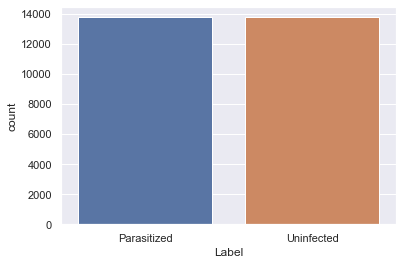

In [16]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Label", data=df)

* We have a balanced dataset for both the classes

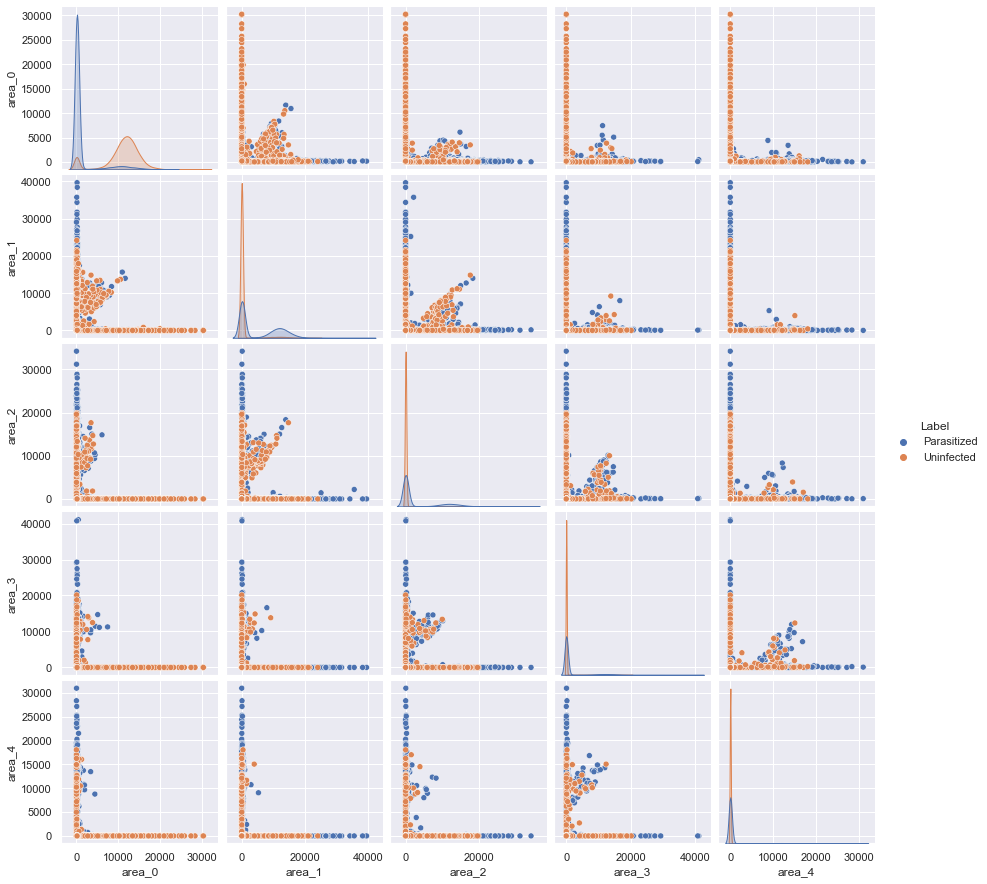

In [17]:
sns.pairplot(df, hue="Label")

* Below pairplot shows relationship of different contour areas with each other and  also  we can see data distribution through histograms that it is not normally distributed

**Correlation Heatmap**

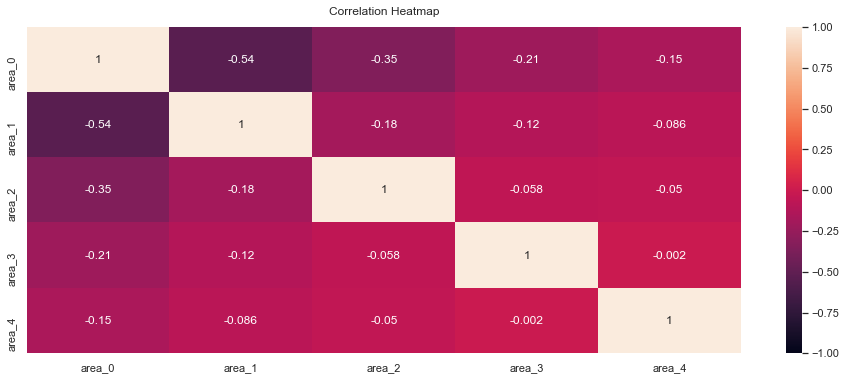

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

* We can clearly see area variables are not correlated with each other